### dreambank.net

Dreambank - data: http://www.dreambank.net/

website com tudo: https://dreams.ucsc.edu/

e-mail: dreams@dreamresearch.net 

### Contents

0) [Data](#data)\
1) [Text pre-processing](#pre_processing)\
2) [Text parsing & Exploratory Data Analysis](#parsing_eda)\
2.1) [All & Top dreamers](#top_all_dreamers)\
2.2) [Individual dreamer](#individual_dreamer)\
3) [Text Representation & Feature Engineering](#fe)\
4) [Modeling / Pattern Mining](#modeling)\
5) [Evaluation](#evaluation)

In [1]:
# usual
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from collections import Counter, defaultdict
import inspect

# text
import re
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from nltk.tokenize import regexp_tokenize, sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from polyglot.text import Text
from polyglot.detect import Detector
from textatistic import Textatistic
import textatistic
import spacy

# train_test, weights, pipe
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import Pipeline

# classifiers
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

C:\Users\Admin\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
data_folder = ''

# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

## 0) Data
<a id="data"></a>

In [3]:
dreambank = pd.read_excel('dreambank.xlsx')

## 1) Text pre-processing
<a id="pre_processing"></a>

In [4]:
dreambank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125310 entries, 0 to 125309
Data columns (total 5 columns):
<dreambank>                        1 non-null object
individual_collection              120 non-null object
id_name_type_sex_age_time_dream    39844 non-null object
number_date_report                 60185 non-null object
codings                            25160 non-null object
dtypes: object(5)
memory usage: 4.8+ MB


In [5]:
# delete unnecessary column
del dreambank['<dreambank>']

In [6]:
# head
dreambank.head(12)

,individual_collection,id_name_type_sex_age_time_dream,number_date_report,codings
0,<collection>,NaN,NaN,NaN
1,NaN,<id>alta</id>,NaN,NaN
2,NaN,<name>Alta: a detailed dreamer</name>,NaN,NaN
3,NaN,<type>series</type>,NaN,NaN
4,NaN,<sex>F</sex>,NaN,NaN
5,NaN,<age>A</age>,NaN,NaN
6,NaN,<time>1985-1997</time>,NaN,NaN
7,NaN,<dream>,NaN,NaN
8,NaN,NaN,<number>1</number>,NaN
9,NaN,NaN,<date>1957</date>,NaN


In [7]:
# dreambank.net codings - ver dps
dreambank['codings'].value_counts().head(10)

<mod>I+</mod>                              754
<obj>AR</obj>                              648
<char>1MKA</char>                          574
<act><code>M</code><init>D</init></act>    537
<obj>TR</obj>                              492
<char>1FKA</char>                          486
<act><code>P</code><init>D</init></act>    476
<act><code>S</code><init>D</init></act>    462
<obj>HH</obj>                              459
<obj>NA</obj>                              424
Name: codings, dtype: int64

In [8]:
# 60 individuals
dreambank.individual_collection.value_counts()

<collection>     60
</collection>    60
Name: individual_collection, dtype: int64

In [9]:
# 19743 dreams
dreambank.id_name_type_sex_age_time_dream.value_counts().head(20)

</dream>                    19743
<dream>                     19743
<type>series</type>            44
<sex>F</sex>                   33
<sex>M</sex>                   27
<age>Y</age>                   24
<age>A</age>                   21
<type>set</type>               16
<age>T</age>                    9
<age>C</age>                    4
<time>mid-1990s</time>          3
<time>1998</time>               3
<time>1996</time>               3
<time>1940s-1950s</time>        2
<time>1962</time>               2
<time>1970</time>               2
<time>1963-1965</time>          2
<time>1996-1997</time>          2
<time>1964</time>               1
<time>1957-1959</time>          1
Name: id_name_type_sex_age_time_dream, dtype: int64

In [10]:
dreambank.head(15)

,individual_collection,id_name_type_sex_age_time_dream,number_date_report,codings
0,<collection>,NaN,NaN,NaN
1,NaN,<id>alta</id>,NaN,NaN
2,NaN,<name>Alta: a detailed dreamer</name>,NaN,NaN
3,NaN,<type>series</type>,NaN,NaN
4,NaN,<sex>F</sex>,NaN,NaN
5,NaN,<age>A</age>,NaN,NaN
6,NaN,<time>1985-1997</time>,NaN,NaN
7,NaN,<dream>,NaN,NaN
8,NaN,NaN,<number>1</number>,NaN
9,NaN,NaN,<date>1957</date>,NaN


In [11]:
# create 'id' column

def recode_id(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<id>"):
        return line[4:-5]
    else:
        return np.nan

dreambank['id'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_id).fillna(method='ffill')

# id's
dreambank.id.value_counts().head(10)

b              18131
norms-f        12850
norms-m        12156
kenneth        10118
emma            9161
norman          6183
b2              5698
pegasus         5473
dorothea        4507
hall_female     3413
Name: id, dtype: int64

In [12]:
# create 'name' column

def recode_name(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<name>"):
        return line[6:-7]
    else:
        return np.nan

dreambank['name'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_name).fillna(method='ffill')

# names
dreambank.name.value_counts().head(10)

Barb Sanders                    18131
Hall/VdC Norms: Female          12850
Hall/VdC Norms: Male            12156
Kenneth                         10118
Emma: 48 years of dreams         9161
Norman: a child molester         6183
Barb Sanders #2                  5698
Pegasus: a factory worker        5473
Dorothea: 53 years of dreams     4507
College women, late 1940s        3413
Name: name, dtype: int64

In [13]:
# create 'type' column

def recode_type(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<type>"):
        return line[6:-7]
    else:
        return np.nan

dreambank['type'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_type).fillna(method='ffill')

# types
dreambank.type.value_counts()

series    85616
set       39691
Name: type, dtype: int64

In [14]:
# create 'sex' column

def recode_sex(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<sex>"):
        return line[5:-6]
    else:
        return np.nan

dreambank['sex'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_sex).fillna(method='ffill')

# genders
print(dreambank.sex.value_counts())

dreambank.drop_duplicates('name').sex.value_counts()

F    76518
M    48788
Name: sex, dtype: int64


F    32
M    27
Name: sex, dtype: int64

In [15]:
# create 'age' column

def recode_age(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<age>"):
        return line[5:-6]
    else:
        return np.nan

dreambank['age'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_age).fillna(method='ffill')

# ages
dreambank.age.value_counts()

Y     51958
A     45159
YA    18131
T      7566
C      1933
TY      558
Name: age, dtype: int64

In [16]:
# create 'time' column

def recode_time(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<time>"):
        return line[6:-7]
    else:
        return np.nan

dreambank['time'] = dreambank['id_name_type_sex_age_time_dream'].apply(recode_time).fillna(method='ffill')

# time
dreambank.time.value_counts().head()

1940s-1950s    25006
1960-1997      18131
1996-1998      10118
1949-1997       9161
1963-1967       6183
Name: time, dtype: int64

In [17]:
# replace '1940s-1950s' with '1940-1950'
dreambank['time'] = dreambank['time'].replace('1940s-1950s', '1940-1950')

# time
dreambank.time.value_counts()

1940-1950     25006
1960-1997     18131
1996-1998     10118
1949-1997      9161
1963-1967      6183
1997-2001      5698
1949-1964      5473
1912-1965      4507
1946-1950      3413
2003-2005      3217
1970           3079
mid-1990s      2463
1963-1965      2241
1985-1997      2118
1996-1997      1956
2001-2003      1748
1980-2002      1746
1962           1711
1999-2000      1583
1998           1544
2003-2004      1478
1939           1178
1971           1108
1992-1998      1068
1996           1014
2000-2001       938
2004            908
1990-1999       838
1957-1959       538
1968            508
1997-2000       498
1991-1993       486
1998-2000       453
2000            443
1897-1918       438
1940-1998       367
1992-1999       323
2007-2010       323
1997            184
1995            178
mid-1980s       176
2003-2006       173
late 1990s      160
1997-1999       123
1990s           116
1948-1949       103
1964             88
Name: time, dtype: int64

In [18]:
dreambank.head(15)

,individual_collection,id_name_type_sex_age_time_dream,number_date_report,codings,id,name,type,sex,age,time
0,<collection>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,<id>alta</id>,NaN,NaN,alta,NaN,NaN,NaN,NaN,NaN
2,NaN,<name>Alta: a detailed dreamer</name>,NaN,NaN,alta,Alta: a detailed dreamer,NaN,NaN,NaN,NaN
3,NaN,<type>series</type>,NaN,NaN,alta,Alta: a detailed dreamer,series,NaN,NaN,NaN
4,NaN,<sex>F</sex>,NaN,NaN,alta,Alta: a detailed dreamer,series,F,NaN,NaN
5,NaN,<age>A</age>,NaN,NaN,alta,Alta: a detailed dreamer,series,F,A,NaN
6,NaN,<time>1985-1997</time>,NaN,NaN,alta,Alta: a detailed dreamer,series,F,A,1985-1997
7,NaN,<dream>,NaN,NaN,alta,Alta: a detailed dreamer,series,F,A,1985-1997
8,NaN,NaN,<number>1</number>,NaN,alta,Alta: a detailed dreamer,series,F,A,1985-1997
9,NaN,NaN,<date>1957</date>,NaN,alta,Alta: a detailed dreamer,series,F,A,1985-1997


In [19]:
# create 'dream_number' & 'dream_date' columns

# number
def recode_number(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<number>"):
        return line[8:-9]
    else:
        return np.nan
    
# date
def recode_date(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<date>"):
        return line[6:-7]
    else:
        return np.nan  

dreambank['dream_number'] = dreambank['number_date_report'].apply(recode_number).fillna(method='ffill')
dreambank['dream_date'] = dreambank['number_date_report'].apply(recode_date).fillna(method='ffill')

In [20]:
# dream_number
dreambank.dream_number.value_counts().head(20)
dreambank.dream_number.value_counts().tail(10)

M07-5    4
M36-6    4
M13-4    4
F35-1    4
F40-6    4
M41-6    4
F46-5    4
M24-1    4
F25-5    4
F23-6    3
Name: dream_number, dtype: int64

In [21]:
# dream_date
dreambank.dream_date.value_counts().head(10)

06/19/66       25029
02/06/64        3107
10/18/97        3092
F, age 16        330
8/16/97          232
5/9/97           220
F, age 17        210
10/06/65         207
[age 20-21]      193
07/25/2000       189
Name: dream_date, dtype: int64

**Dreams column**

In [22]:
# dream example
dreambank['number_date_report'][10]

"<report><![CDATA[The one at the Meads's house, where it's bigger inside than out; there's a European village just inside, with a cobblestone street and a Pied-Piper sort of man with curly hair, he can do things like juggle - I go up the back stairs [there aren't any in the real house] and then down the other side [since there's a second set, immediately] then down a short empty hallway that turns a corner, where I find a tiny room...a young woman with shoulder-length blonde hair in a pageboy is there, cooking at a stove that almost fills the room...she's nice to me. Now outside, I'm waiting for my aunt to pick me up - she arrives in a little round convertible and we go for a drive, not very far - we cross a little bridge over a creek, then double back and she drops me off at the house again. Inside (?) I sit with a couple of people, playing with a string of blue balloons.]]></report>"

In [23]:
# create 'dream' column

def recode_dream(line): 
    if type(line) == float:
        return np.nan
    elif line.startswith("<report>"):
        return line[17:-12]
    else:
        return np.nan

dreambank['dream'] = dreambank['number_date_report'].apply(recode_dream)

dreambank.head()

,individual_collection,id_name_type_sex_age_time_dream,number_date_report,codings,id,name,type,sex,age,time,dream_number,dream_date,dream
0,<collection>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,<id>alta</id>,NaN,NaN,alta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,<name>Alta: a detailed dreamer</name>,NaN,NaN,alta,Alta: a detailed dreamer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,<type>series</type>,NaN,NaN,alta,Alta: a detailed dreamer,series,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,<sex>F</sex>,NaN,NaN,alta,Alta: a detailed dreamer,series,F,NaN,NaN,NaN,NaN,NaN


In [24]:
# codings
dreambank.codings.value_counts()

<mod>I+</mod>                                                        754
<obj>AR</obj>                                                        648
<char>1MKA</char>                                                    574
<act><code>M</code><init>D</init></act>                              537
<obj>TR</obj>                                                        492
<char>1FKA</char>                                                    486
<act><code>P</code><init>D</init></act>                              476
<act><code>S</code><init>D</init></act>                              462
<obj>HH</obj>                                                        459
<obj>NA</obj>                                                        424
<obj>CL</obj>                                                        416
<emot><code>AP</code><char>D</char></emot>                           414
<mod>S+</mod>                                                        388
<obj>AD</obj>                                      

## 2) Text parsing & Exploratory Data Analysis
<a id="parsing_eda"></a>

In [25]:
# Select data with dreams df
dreams_df = dreambank[dreambank['dream'].notnull()][['id', 'name', 'type', 'sex', 'age', 'time',
                                                 'dream_number', 'dream_date', 'dream']].reset_index(drop=True)

# ver depois a coluna dos codings (não incluí) --> classificação dos sentimentos feito por eles, dreambank

# new df
dreams_df.head(15)

,id,name,type,sex,age,time,dream_number,dream_date,dream
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,"The one at the Meads's house, where it's bigge..."
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,"I am in some public place, reminds me of the g..."
2,alta,Alta: a detailed dreamer,series,F,A,1985-1997,100,5/30/86,"I'm driving a car somewhere, because it's sout..."
3,alta,Alta: a detailed dreamer,series,F,A,1985-1997,101,5/31/86,"I'm around a bunch of people working together,..."
4,alta,Alta: a detailed dreamer,series,F,A,1985-1997,102,5/31/86,I'm in a house - I don't think it's mine - the...
5,alta,Alta: a detailed dreamer,series,F,A,1985-1997,103,6/7/86,I'm out someplace pretty far from home and I w...
6,alta,Alta: a detailed dreamer,series,F,A,1985-1997,104,6/7/86,I'm on a bus with a couple of guys - one's the...
7,alta,Alta: a detailed dreamer,series,F,A,1985-1997,105,6/9/86,I live in a little house a bit like Grandmom's...
8,alta,Alta: a detailed dreamer,series,F,A,1985-1997,106,6/11/86,"I'm on a bus, going to the dentist, across an ..."
9,alta,Alta: a detailed dreamer,series,F,A,1985-1997,107,6/15/86,I've just gotten home from school - I live in ...


In [26]:
# dtype
dreams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 9 columns):
id              19431 non-null object
name            19431 non-null object
type            19431 non-null object
sex             19431 non-null object
age             19431 non-null object
time            19431 non-null object
dream_number    19431 non-null object
dream_date      19431 non-null object
dream           19431 non-null object
dtypes: object(9)
memory usage: 1.3+ MB


### 2.1) All & Top dreamers
<a id="top_all_dreamers"></a>

#### Gender distribution

F    11748
M     7683
Name: sex, dtype: int64


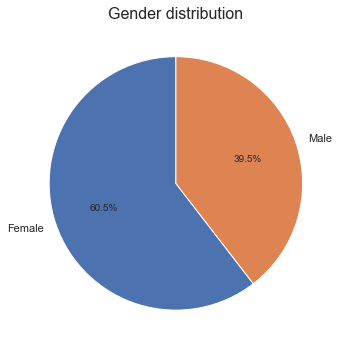

In [27]:
# Gender distribution of dreams
print(dreams_df['sex'].value_counts())

gender_dist = dreams_df['sex'].value_counts()

labels = ["Female", "Male"]
sizes = [gender_dist['F']/gender_dist.sum(), gender_dist['M']/gender_dist.sum()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)  # 
plt.title("Gender distribution", fontsize=16)
plt.ylabel("")
plt.subplots_adjust(left=0, bottom=-0.1, right=2, top=1, wspace=0, hspace=0)
plt.show()

#### Age distribution

A     8229
Y     6515
YA    3116
T     1080
C      381
TY     110
Name: age, dtype: int64


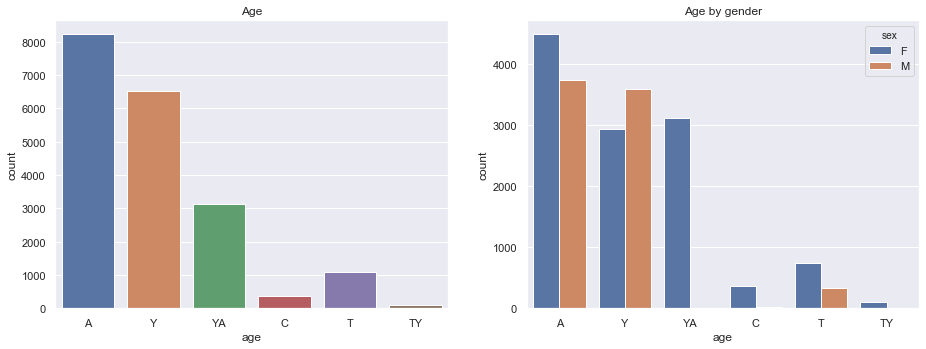

In [28]:
# Age distribution of dreams
print(dreams_df['age'].value_counts())

# bar plot
plt.subplot(1, 2, 1)
sns.countplot('age', data=dreams_df)
plt.title('Age')

plt.subplot(1, 2, 2)
sns.countplot('age', data=dreams_df, hue='sex')
plt.title('Age by gender')

plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.2, hspace=0)
plt.show()

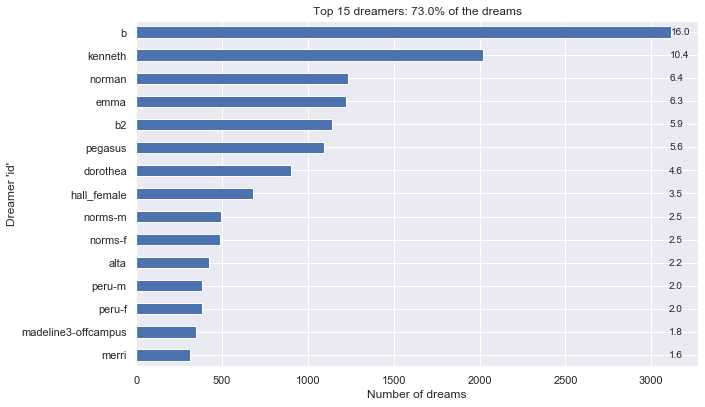

In [29]:
# top dreamers

# number of dreamers
n = 15

top_dreamers = dreams_df['id'].value_counts(ascending=True).tail(n)#.plot(kind='barh')

dreams_df_index = dreams_df['id'].value_counts().index
pos = np.arange(len(top_dreamers))
pos_2 = round(top_dreamers/len(dreams_df['dream'])*100, 1)

# add the percentages to the side of each bar
for p, cidx, td in zip(pos, dreams_df_index, pos_2):
    plt.annotate(td, xy=(td+3100, p), va='center')

# plot
top_dreamers.plot(kind='barh')

t = round(np.sum(top_dreamers/len(dreams_df['dream'])*100))   
plt.title("Top {} dreamers: {}% of the dreams".format(n, t))
plt.xlabel("Number of dreams")
plt.ylabel("Dreamer 'id'")
plt.subplots_adjust(left=0, bottom=-0.2, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

In [30]:
dreams_df.head()

,id,name,type,sex,age,time,dream_number,dream_date,dream
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,"The one at the Meads's house, where it's bigge..."
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,"I am in some public place, reminds me of the g..."
2,alta,Alta: a detailed dreamer,series,F,A,1985-1997,100,5/30/86,"I'm driving a car somewhere, because it's sout..."
3,alta,Alta: a detailed dreamer,series,F,A,1985-1997,101,5/31/86,"I'm around a bunch of people working together,..."
4,alta,Alta: a detailed dreamer,series,F,A,1985-1997,102,5/31/86,I'm in a house - I don't think it's mine - the...


In [31]:
# repeated dreams

# dreams_df.dream_date.value_counts()
# dreams_df.time.value_counts()
dreams_df.dream.value_counts().head(3)   # só 1 sonho repetido

I was working in a printing plant.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [32]:
# number of dreams in each year

range_years_4 = range(1933, 2020)
range_years_2 = ['%02d' % t for t in np.arange(0, 100)]

# 1933 - 2019
four_digits = pd.Series([np.sum(dreams_df.dream_date.str.contains(str(i))) for i in range_years_4], index=range_years_4)

# /00 - /99
two_digits = pd.Series([np.sum(dreams_df.dream_date.str.endswith('/{}'.format(i))) for i in range_years_2], 
                       index=range_years_2)


In [33]:
# 2000 - 2019
a = two_digits[:20]
b = four_digits[-20:]
a.index = b.index
c_1 = a.add(b, fill_value=0)

# 1933 - 1999
d = two_digits[33:]
e = four_digits[:-20]
d.index = e.index
c_2 = d.add(e, fill_value=0)

# join c_1 and c_2
total_years = c_1.add(c_2, fill_value=0)

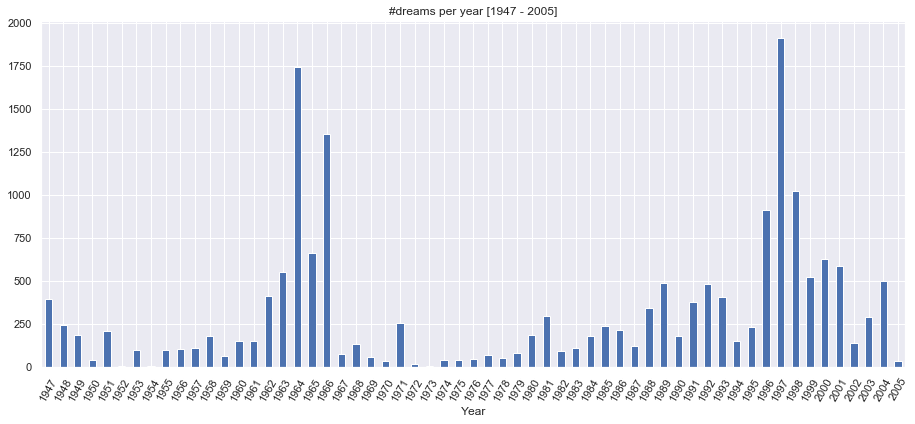

In [34]:
# 1947 - 2005
total_years[14:-14].plot(kind='bar')
plt.title("#dreams per year [1947 - 2005]")
plt.xlabel("Year")
plt.xticks(rotation=60)
plt.subplots_adjust(left=0, bottom=-0.2, right=2, top=1, wspace=0, hspace=0)
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  


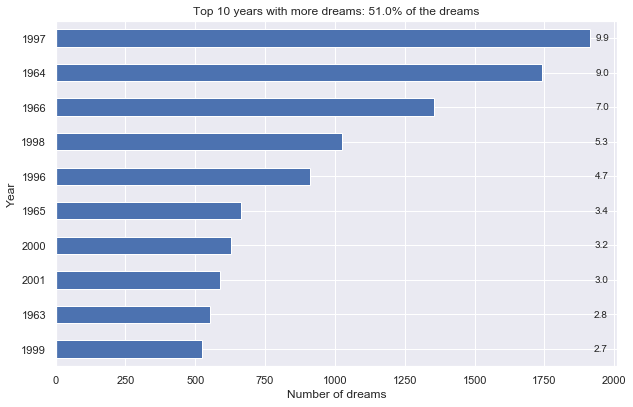

In [35]:
# top number of records/dreams per year

# number of records
n = 10

top_records = total_years.iloc[total_years.nonzero()].sort_values(ascending=True).tail(n)

top_records_index = total_years.iloc[total_years.nonzero()].sort_values().index
pos = np.arange(len(top_records))
pos_2 = round(top_records/len(dreams_df['dream'])*100, 1)

# add the percentages to the side of each bar
for p, cidx, tr in zip(pos, top_records_index, pos_2):
    plt.annotate(tr, xy=(tr+1925, p), va='center')

# plot
top_records.plot(kind='barh')

t = round(np.sum(top_records/len(dreams_df['dream'])*100))   
plt.title("Top {} years with more dreams: {}% of the dreams".format(n, t))
plt.xlabel("Number of dreams")
plt.ylabel("Year")
plt.subplots_adjust(left=0, bottom=-0.2, right=1.3, top=1, wspace=0, hspace=0)
plt.show()

In [36]:
# add dream_year column

list_1 = range(1933, 2020)
list_2 = ['%02d' % t for t in np.arange(0, 100)]

def recode_dream_year(line): 
    if type(line) == float:
        return np.nan
    for i in list_1:
        if str(i) in line:
            return i
    for j in list_2:
        if line.endswith('/{}'.format(j)) | line.endswith('/{}?'.format(j)):
            if j in list_2[0:20]:
                return '20'+j
            else:
                return '19'+j
    else:
        return np.nan

dreams_df['dream_year'] = dreams_df['dream_date'].apply(recode_dream_year)

# rearrange the column
cols = dreams_df.columns
cols = cols[:-2].tolist() + ['dream_year', 'dream']
dreams_df = dreams_df[cols]

# convert to int
dreams_df['dream_year'] = dreams_df['dream_year'].astype(int, errors='ignore')

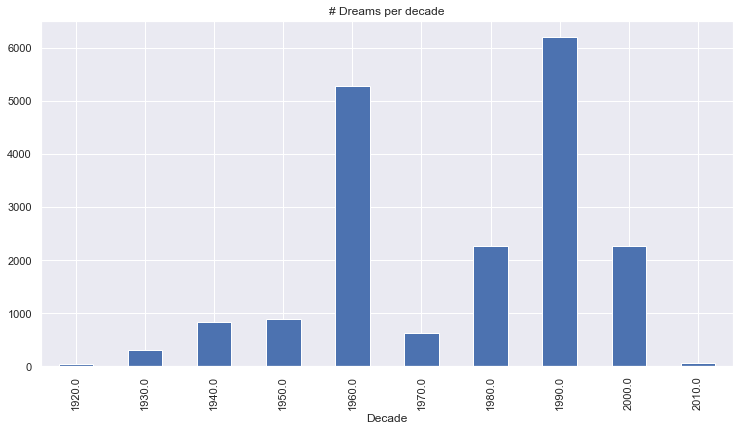

In [37]:
# plot the decades

# plot
dreams_df.groupby(dreams_df.dream_year.astype(float, errors='ignore') // 10 * 10).size().plot(kind='bar', grid=True)

plt.title("# Dreams per decade")
plt.xlabel("Decade")
# plt.xticks(range(1920, 2020, 10))
plt.subplots_adjust(left=0, bottom=-0.2, right=1.6, top=1, wspace=0, hspace=0)
plt.show()

In [38]:
# see the distribution by gender
d_2 = pd.read_excel('dreambank.xlsx')
d_2['sex'] = d_2['id_name_type_sex_age_time_dream'].apply(recode_sex)

# distribution by gender
d_2.sex.value_counts()

F    33
M    27
Name: sex, dtype: int64

In [39]:
dreams_df.head(10)

,id,name,type,sex,age,time,dream_number,dream_date,dream_year,dream
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,1957,"The one at the Meads's house, where it's bigge..."
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,1985,"I am in some public place, reminds me of the g..."
2,alta,Alta: a detailed dreamer,series,F,A,1985-1997,100,5/30/86,1986,"I'm driving a car somewhere, because it's sout..."
3,alta,Alta: a detailed dreamer,series,F,A,1985-1997,101,5/31/86,1986,"I'm around a bunch of people working together,..."
4,alta,Alta: a detailed dreamer,series,F,A,1985-1997,102,5/31/86,1986,I'm in a house - I don't think it's mine - the...
5,alta,Alta: a detailed dreamer,series,F,A,1985-1997,103,6/7/86,1986,I'm out someplace pretty far from home and I w...
6,alta,Alta: a detailed dreamer,series,F,A,1985-1997,104,6/7/86,1986,I'm on a bus with a couple of guys - one's the...
7,alta,Alta: a detailed dreamer,series,F,A,1985-1997,105,6/9/86,1986,I live in a little house a bit like Grandmom's...
8,alta,Alta: a detailed dreamer,series,F,A,1985-1997,106,6/11/86,1986,"I'm on a bus, going to the dentist, across an ..."
9,alta,Alta: a detailed dreamer,series,F,A,1985-1997,107,6/15/86,1986,I've just gotten home from school - I live in ...


In [40]:
dreams_df.age.unique()

array(['A', 'Y', 'YA', 'C', 'T', 'TY'], dtype=object)

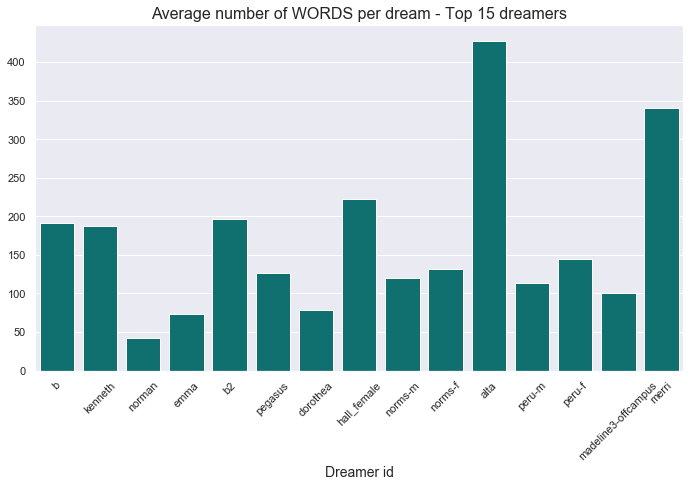

In [41]:
# Average number of words per dream - Top dreamers

n = 15

top_dreamers = dreams_df['id'].value_counts(ascending=False).head(n).index

from nltk.tokenize import regexp_tokenize

# function for the average number of words in a dream of a dreamer
def avg_words_dream(id):
    length_dream = []
    for i in dreams_df[dreams_df['id'] == id].dream:
        length_dream.append(len(regexp_tokenize(i, '\w+')))
    return round(np.mean(length_dream)).astype(np.int)

#plot
sns.barplot(top_dreamers, [avg_words_dream(i) for i in top_dreamers], color='teal')
plt.title("Average number of WORDS per dream - Top {} dreamers".format(n), fontsize=16)
plt.xlabel("Dreamer id", fontsize=14)
plt.xticks(rotation=45)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

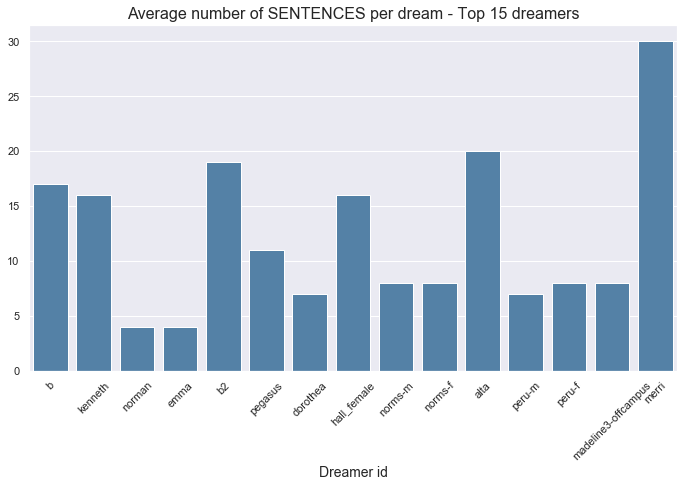

In [42]:
# Average number of sentences per dream - Top dreamers

n = 15

top_dreamers = dreams_df['id'].value_counts(ascending=False).head(n).index

from nltk.tokenize import sent_tokenize

# function for the average number of words in a dream of a dreamer
def avg_sentences_dream(id):
    length_dream = []
    for i in dreams_df[dreams_df['id'] == id].dream:
        length_dream.append(len(sent_tokenize(i)))
    return round(np.mean(length_dream)).astype(np.int)

#plot
sns.barplot(top_dreamers, [avg_sentences_dream(i) for i in top_dreamers], color='steelblue')
plt.title("Average number of SENTENCES per dream - Top {} dreamers".format(n), fontsize=16)
plt.xlabel("Dreamer id", fontsize=14)
plt.xticks(rotation=45)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

In [43]:
%%script false
# Most used words
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# words in each dream
j = [regexp_tokenize(i, '\w+') for i in dreams_df.dream]

# all the words in all the dreams 
all_words = [x for i in j for x in i]

# convert to lower case and exclude stopwords
all_words = [i.lower() for i in all_words]
all_words = [i for i in all_words if i not in stopwords.words('english')]

# Count the occurence of words in all dreams
counter = Counter(all_words)

n = 30

# n most common words
most_common = counter.most_common(n)
print("{} most common words used:\n {}".format(n, most_common), "\n")

# 30 most common words used:
#  [('one', 12687), ('like', 11640), ('go', 11546), ('br', 11353), ('see', 11242), ('get', 10913), ('back', 8875), 
# ('room', 7358), ('man', 7332), ('going', 7298), ('people', 6676), ('house', 6474), ('said', 6093), ('around', 5876), 
# ('something', 5835), ('say', 5421), ('know', 5360), ('went', 5342), ('dream', 5315), ('would', 5165), ('woman', 4858),
# ('think', 4827), ('says', 4663), ('got', 4632), ('us', 4626), ('two', 4591), ('time', 4543), ('car', 4483), 
# ('look', 4378), ('could', 4050)]

Couldn't find program: 'false'


#### Readability tests

In [44]:
from textatistic import Textatistic

# manually compute the Flesch score
dream_example = dreams_df['dream'][1]

print(dream_example, "\n")

# using nltk
print("score nltk:", 206.835 - 1.015*(len(regexp_tokenize(dream_example, '\w+'))/len(sent_tokenize(dream_example))) - \
84.6*(Textatistic(dream_example).dict()['sybl_count']/len(regexp_tokenize(dream_example, '\w+'))))

# using Textatistic
print("score Textatistic:", 206.835 - 1.015*(Textatistic(dream_example).dict()['word_count']/ \
                                             Textatistic(dream_example).dict()['sent_count']) - \
         84.6*(Textatistic(dream_example).dict()['sybl_count']/Textatistic(dream_example).dict()['word_count']))

# differences
print("\nTotal words: nltk {}, Textatistic {}".format(len(regexp_tokenize(dream_example, '\w+')), 
                                                     Textatistic(dream_example).dict()['word_count']))

print("Total sentences: nltk {}, Textatistic {}".format(len(sent_tokenize(dream_example)), 
                                                          Textatistic(dream_example).dict()['sent_count']))

print("Total syllables Textatistic: {}".format(Textatistic(dream_example).dict()['sybl_count']))

I am in some public place, reminds me of the grocery store in another dream, or lots of airports - there is food involved, and for some reason or other people are eating in the restroom. (This isn't normal.) I'm sitting at the mirror-counter next to a man, and am very ill at ease about it. There's no actual reason for it, it's entirely the principle of the thing. 

score nltk: 87.48659246575342
score Textatistic: 82.65668478260872

Total words: nltk 73, Textatistic 69
Total sentences: nltk 4, Textatistic 4
Total syllables Textatistic: 87


In [45]:
%%time

from textatistic import Textatistic

# Readability types
readabilities = ['flesch_score', 'gunningfog_score', 'dalechall_score']

for i in readabilities:
    # define readability score
    def read_score(text, metric=i):
        try:
            score = Textatistic(text).scores[metric]
        except:
            score = np.nan
        return score
    # create column
    dreams_df[i] = dreams_df['dream'].apply(read_score)


Wall time: 14min 39s


In [46]:
dreams_df.head()

,id,name,type,sex,age,time,dream_number,dream_date,dream_year,dream,flesch_score,gunningfog_score,dalechall_score
0,alta,Alta: a detailed dreamer,series,F,A,1985-1997,1,1957,1957,"The one at the Meads's house, where it's bigge...",89.080227,7.327273,5.890355
1,alta,Alta: a detailed dreamer,series,F,A,1985-1997,10,1985?,1985,"I am in some public place, reminds me of the g...",82.656685,7.479710,6.322825
2,alta,Alta: a detailed dreamer,series,F,A,1985-1997,100,5/30/86,1986,"I'm driving a car somewhere, because it's sout...",81.282474,10.348070,6.637248
3,alta,Alta: a detailed dreamer,series,F,A,1985-1997,101,5/31/86,1986,"I'm around a bunch of people working together,...",89.334178,8.268518,6.263077
4,alta,Alta: a detailed dreamer,series,F,A,1985-1997,102,5/31/86,1986,I'm in a house - I don't think it's mine - the...,76.649133,11.432653,7.268537


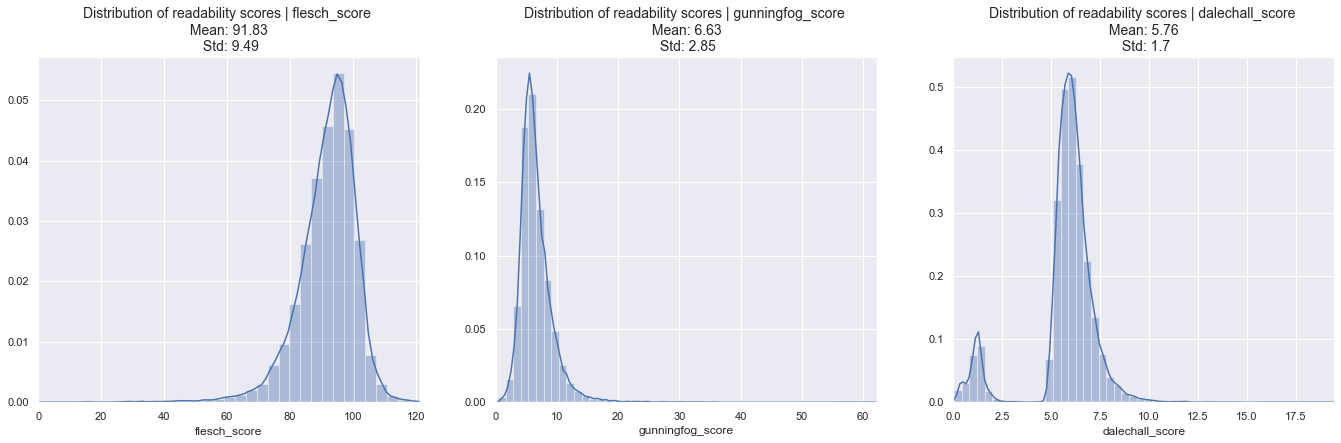

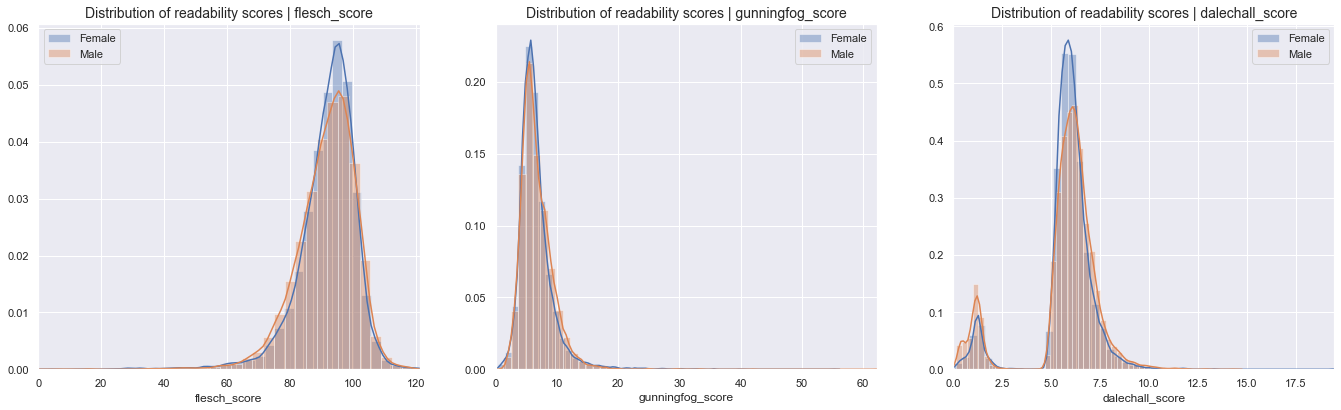

In [47]:
import inspect

# All dreamers

# Readability types
readabilities = ['flesch_score', 'gunningfog_score', 'dalechall_score']

# distribution plots
for j, i in enumerate(readabilities):
    # distribution plots
    plt.subplot(1, 3, j + 1)
    sns.distplot(dreams_df[dreams_df[i].notnull()][i])
    plt.title("""Distribution of readability scores | {} \n Mean: {} \n Std: {}""".format(i, 
                                                                                          round(np.mean(dreams_df[i]), 2),
                                                                                          round(np.std(dreams_df[i]), 2)),
              fontsize=14)
    plt.xlim(0, np.max(dreams_df[i]))
    
plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0.2, hspace=0)
plt.show()

###############################################################################################

# distribution plots - Male & Female 
for j, i in enumerate(readabilities):
    # distribution plots
    plt.subplot(1, 3, j + 1)
    sns.distplot(dreams_df[(dreams_df[i].notnull()) & (dreams_df['sex'] == 'F')][i])
    sns.distplot(dreams_df[(dreams_df[i].notnull()) & (dreams_df['sex'] == 'M')][i])
    plt.title("""Distribution of readability scores | {}""".format(i), fontsize=14)
    plt.xlim(0, np.max(dreams_df[i]))
    plt.legend(['Female', 'Male'])
    
plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0.2, hspace=0)
plt.show()

In [48]:
print("""The Flesch score does not have a theoretical lower bound; therefore, it is possible to make the score as low as 
wanted by arbitrarily including words with many syllables.""")
dreams_df[dreams_df['flesch_score'] <= 0]

The Flesch score does not have a theoretical lower bound; therefore, it is possible to make the score as low as 
wanted by arbitrarily including words with many syllables.


,id,name,type,sex,age,time,dream_number,dream_date,dream_year,dream,flesch_score,gunningfog_score,dalechall_score
5695,blind-f,Blind dreamers (F),set,F,A,mid-1990s,111-27,5/16/97,1997,I was on the telephone with a person named T w...,-32.600588,55.282353,11.543129
5851,blind-m,Blind dreamers (M),set,M,A,mid-1990s,104-04,5/19/97,1997,"I dreamed I was in a room, I think it was a li...",-51.143624,62.284564,12.934417


In [49]:
# ?? supostamente complexas
print(dreams_df[dreams_df['flesch_score'] <= 10].flesch_score, "\n")

print(dreams_df['dream'][5888])
#################################
print("\n--> Possível motivo para quase todos: sonhos sem pontuação, com uma frase só")
print("""\n--> Not this metric, since the greater the average sentence length the harder it is to read, supposedly""")

5695    -32.600588
5851    -51.143624
5888      6.913462
17922     4.188387
Name: flesch_score, dtype: float64 

We were on a trip somewhere, had been down south and were on our way back and somehow we stopped at a rest area and I ended up talking to somebody on the phone for a long time that we had met earlier on our trip in another state I think, it might have been Ohio, I don't know what state we were in at this rest stop but I remember thinking that I had to get off the phone and use the bathroom and get a Coke so I told the person I had to go and would talk to him another time.

--> Possível motivo para quase todos: sonhos sem pontuação, com uma frase só

--> Not this metric, since the greater the average sentence length the harder it is to read, supposedly


**===================================================================================================================**

### 2.2) Individual dreamer
<a id="individual_dreamer"></a>

## <font color='darkgreen'>Individual best case: Barb Sanders</font>

In [50]:
dreamer = 'Barb Sanders'
dreamer2 = 'Barb Sanders #2'

# Barb Sanders dataframe
b_df = dreams_df[(dreams_df['name'] == dreamer) | (dreams_df['name'] == dreamer2)]

#### Number of dreams per year

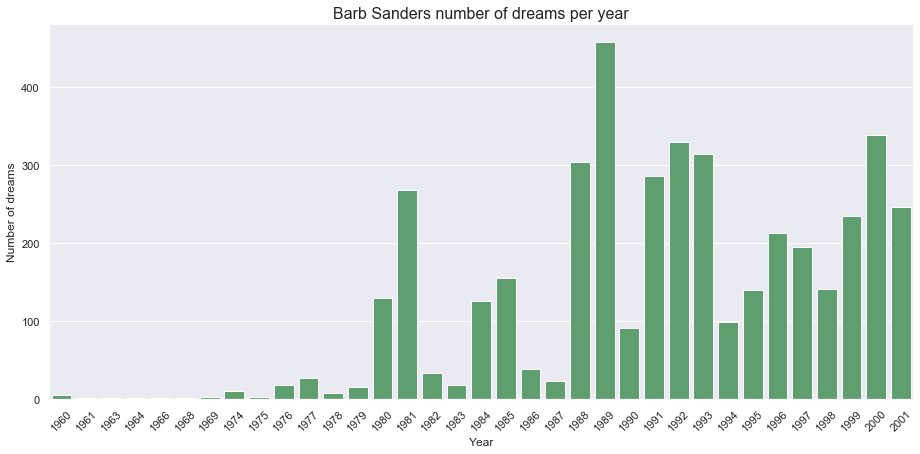

In [51]:
# number of dreams per year (recorded)
nr_dreams = b_df['dream_year'].value_counts().sort_index()

# nr dreams per year
x_0 = nr_dreams.index.astype(np.int)
x = []
y = np.arange(int(min(nr_dreams.index)), int(max(nr_dreams.index))+1)

for i in y:
    if i not in x_0:
        x.append(0)
    else:
        x.append(nr_dreams.loc[str(i)])

# annotate
# plot
sns.barplot(x=nr_dreams.index, y=nr_dreams, color='g')  
plt.title("{} number of dreams per year".format(dreamer), fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of dreams")
plt.xticks(rotation=45)
plt.subplots_adjust(left=0, bottom=-0.3, right=2, top=1, wspace=0, hspace=0)
plt.show()

#### Total number of dreams, Words & Sentences | descriptive statistics

In [52]:
# Total number of dreams
print("Total number of dreams: {}".format(len(b_df.dream.notnull())))

###############################################################################################################

import textatistic

# Average number of words in a dream (textatistic)
def avg_words(df):
    length_dream = []
    for i in df.dream:
        length_dream.append(textatistic.word_count(i))
    return round(np.mean(length_dream)).astype(np.int)

print("Average number of words in a dream: {} (Textatistic)".format(avg_words(b_df)))

###############################################################################################################

# Average number of sentences in a dream (textatistic)
def avg_sents(df):
    length_dream = []
    for i in df.dream:
        length_dream.append(textatistic.sent_count(i))
    return round(np.mean(length_dream)).astype(np.int)

print("Average number of sentences in a dream: {} (Textatistic)".format(avg_sents(b_df)))

###############################################################################################################

Total number of dreams: 4254
Average number of words in a dream: 188 (Textatistic)
Average number of sentences in a dream: 18 (Textatistic)


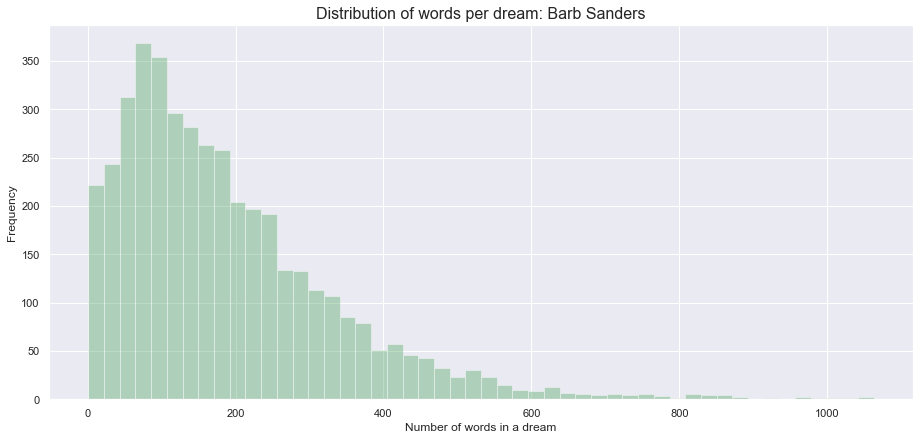

In [53]:
# number of words per dream
w_per_dream = [textatistic.word_count(i) for i in b_df.dream]

sns.distplot(w_per_dream, kde=False, color='g')
plt.title("Distribution of words per dream: {}".format(dreamer), fontsize=16)
plt.xlabel("Number of words in a dream")
plt.ylabel("Frequency")
plt.subplots_adjust(left=0, bottom=-0.3, right=2, top=1, wspace=0, hspace=0)
plt.show()

#### Readability scores

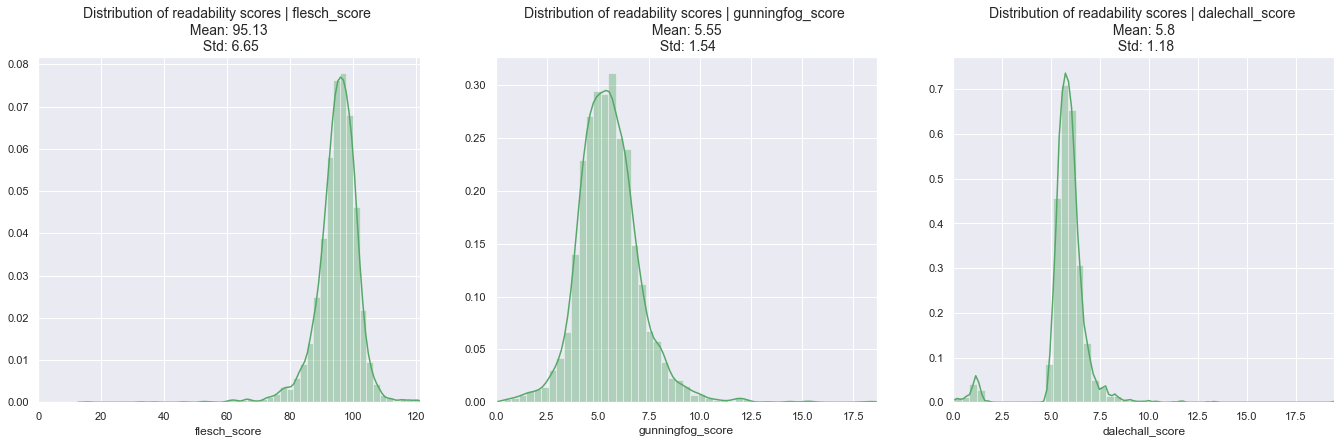

In [54]:
# Readability plot

# Readability score types
readabilities = ['flesch_score', 'gunningfog_score', 'dalechall_score']

# distribution plot
for j, i in enumerate(readabilities):
    # distribution plots
    plt.subplot(1, 3, j + 1)
    sns.distplot(b_df[b_df[i].notnull()][i], color='g')
    plt.title("""Distribution of readability scores | {} \n Mean: {} \n Std: {}""".format(i, 
                                                                                          round(np.mean(b_df[i]), 2),
                                                                                          round(np.std(b_df[i]), 2)),
              fontsize=14)
    plt.xlim(0, np.max(b_df[i]))
    
plt.subplots_adjust(left=0, bottom=-0.2, right=3, top=1, wspace=0.2, hspace=0)
plt.show()

## <font color='darkgreen'>**Topic identification**</font>

#### nltk

25 most common words used by Barb Sanders (without nltk stopwords & using WordNetLemmatizer):
 
[('say', 5954), ('see', 5381), ('go', 4968), ('get', 4198), ('like', 3895), ('man', 3142), ('one', 3128), ('woman', 2806), ('look', 2773), ('room', 2635), ('back', 2604), ('come', 2430), ('want', 2270), ('feel', 2120), ('around', 1711), ('walk', 1618), ('going', 1583), ('house', 1547), ('thing', 1442), ('find', 1419), ('people', 1353), ('try', 1337), ('take', 1334), ('think', 1311), ('door', 1258)] 



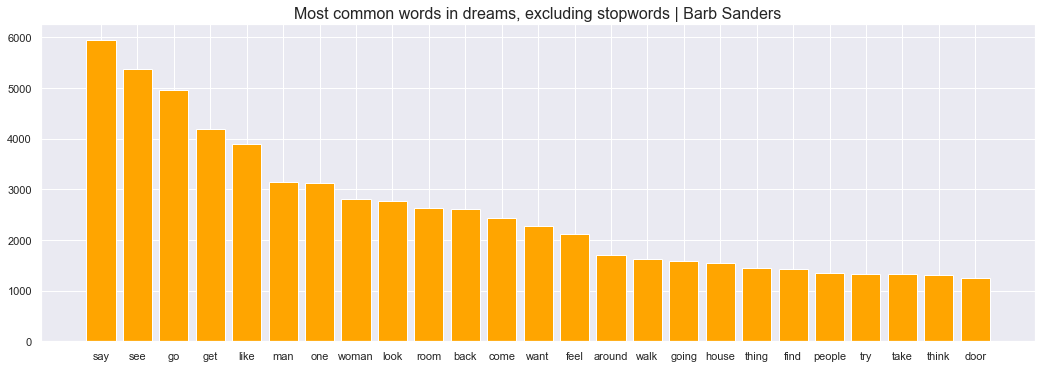

Wall time: 4min 12s


In [55]:
%%time

# Most used words
from collections import Counter
from nltk.tokenize import word_tokenize, regexp_tokenize
from nltk.corpus import stopwords

# words in each dream
j = [regexp_tokenize(i, '\w+') for i in b_df.dream]

# all the words in all the dreams 
all_words = [x for i in j for x in i]

# convert to lower case and exclude stopwords
all_words = [i.lower() for i in all_words]
all_words = [i for i in all_words if i not in stopwords.words('english')]

# lemmatize 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
all_words = [lemmatizer.lemmatize(w) for w in all_words]

# Count the occurence of words in all dreams
counter = Counter(all_words)

n = 25

# n most common words
most_common = counter.most_common(n)
print("{} most common words used by {} (without nltk stopwords & using WordNetLemmatizer):\n \n{}".format(
      n, dreamer, most_common), "\n")

# from nltk.stem import WordNetLemmatizer --> tira o plural das palavras

# plot
[plt.bar(i, j, color='orange') for (i, j) in most_common]

plt.title("Most common words in dreams, excluding stopwords | {}".format(dreamer), fontsize=16)
plt.subplots_adjust(left=0, bottom=-0.1, right=2.3, top=1, wspace=0, hspace=0)
plt.show()

#### spaCy POS tagging

In [56]:
%%time
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# list of (future lists of) tokens and pos tags
tokens_pos = []
for i in b_df.dream:
    # Create the Doc object
    doc = nlp(i)
    # Generate list of tokens and pos tags
    pos = [(token.text, token.pos_) for token in doc]
    # append to list of all the tokens and tags in dreams
    tokens_pos.append(pos)
    
# primeiro criei uma lista que reúne a lista com tuples (palavra, POS tag) de cada sonho (token_pos) --> pode ser preciso
# mais tarde. (+3 minutos)
# agora crio um dicionário com todas as palavras associadas a cada POS tag, de todos os sonhos (543 milisegundos)
    
# POS tags
dict_POS = {}

# for each dream pos aggregate tuples
for i in tokens_pos:
    # for each tuple
    for tuple_pos in i:
        # add the word to the POS (example: 'Bill' to 'PROPN', or 'had' to 'VERB')
        if tuple_pos[1] not in dict_POS.keys():
            dict_POS[tuple_pos[1]] = []
            dict_POS[tuple_pos[1]] += [tuple_pos[0]]
        else:
            dict_POS[tuple_pos[1]] += [tuple_pos[0]]
            

Wall time: 3min 37s


In [57]:
# POS tags encontrados
print(dict_POS.keys())

dict_keys(['PRON', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'PROPN', 'PUNCT', 'CCONJ', 'ADV', 'PART', 'SPACE', 'INTJ', 'NUM', 'SYM', 'AUX', 'X'])


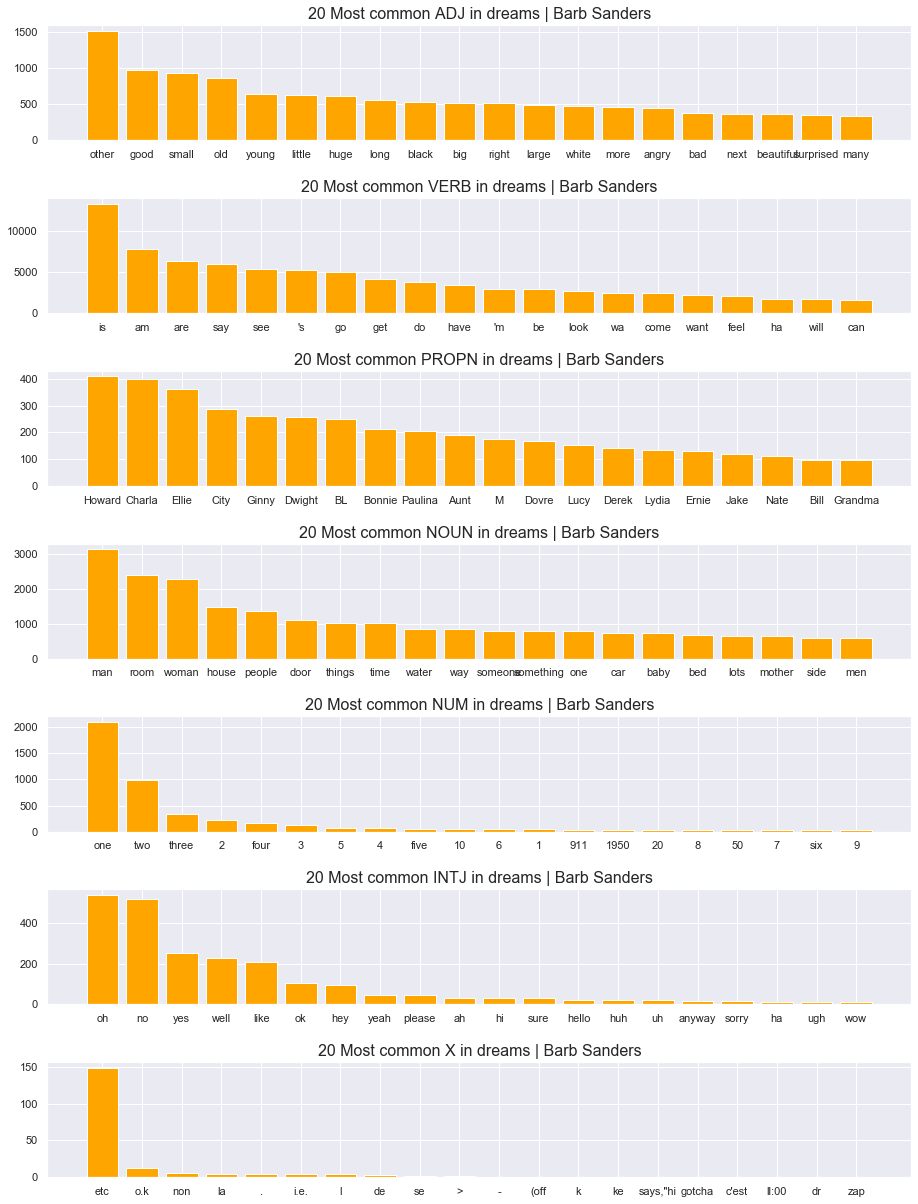

In [58]:
# several plots
from nltk.stem import WordNetLemmatizer

# Count the occurence of POS tags in all dreams

# POS tag annotations - ver https://spacy.io/api/annotation
pos_tags = ['ADJ', 'VERB', 'PROPN', 'NOUN', 'NUM', 'INTJ', 'X']  # 'X' is other

# number we want to see
n = 20

# first, define POS tags that could require more time to process
counter_verb = Counter([WordNetLemmatizer().lemmatize(w).lower() for w in dict_POS['VERB']])  # lower and lemmatize

###########################################################

for i, j in enumerate(pos_tags):
    # Count the POS tag - also lower case them all except if it is a proper noun
    if j == 'PROPN':
        counter = Counter(dict_POS[j])  # normal
    elif j == 'VERB':
        counter = counter_verb  # lower and lemmatize
    else:
        counter = Counter([i.lower() for i in dict_POS[j]])  # lower
    # n most common tags
    most_common = counter.most_common(n)
    # plot
    plt.subplot(len(pos_tags), 1, i+1)
    [plt.bar(i, j, color='orange') for (i, j) in most_common]
    plt.title("{} Most common {} in dreams | {}".format(n, pos_tags[i], dreamer), fontsize=16)

plt.subplots_adjust(left=0, bottom=-3, right=2, top=1, wspace=0, hspace=0.5)
plt.show()

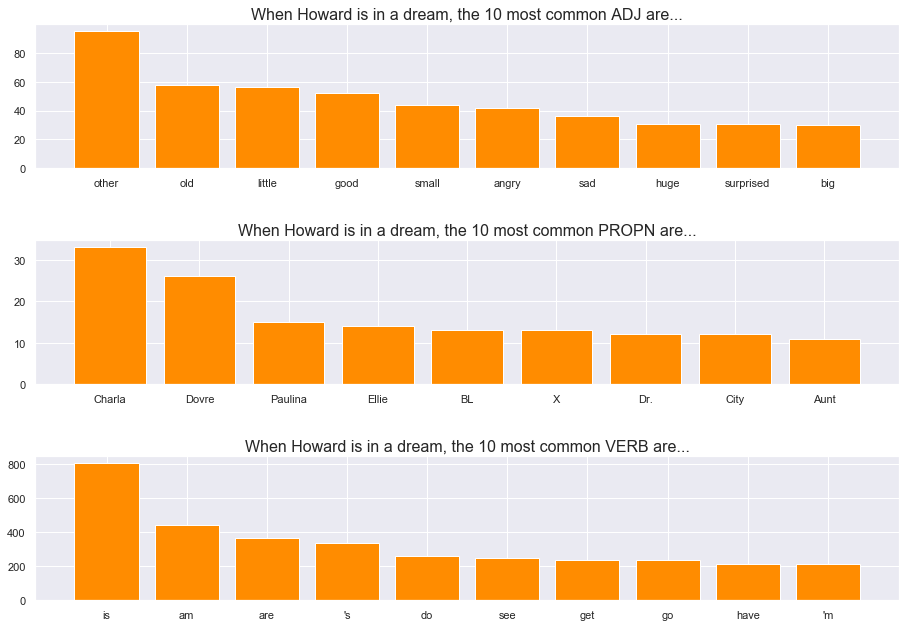

In [59]:
# Plot several things

person_x = 'Howard'
common_whats = ['ADJ', 'PROPN', 'VERB']
n = 10

for nr, what in enumerate(common_whats):
    # when
    #print("""When {} is in a dream, the {} most common {} are...""".format(person_x, n, what))

    # create list of lists with the common what
    counter_what = []
    for i in tokens_pos:
        dream_ex = i
        if person_x in [tuple_word[0] for tuple_word in dream_ex]:
            counter_what.append([tuple_word[0] for tuple_word in dream_ex if tuple_word[1] == what])

    # just a list with the counter_whats
    counter_whats = []
    for i in counter_what:
        for adj_dream in i:
            counter_whats.append(adj_dream)
        
    # Counter
    counter = Counter(counter_whats)

    # n most common words
    if what == 'PROPN':
        most_common = counter.most_common(n)[1:]  # tira-se a própria person_x
    else:
        most_common = counter.most_common(n)
    #print(most_common)  

    # plot
    plt.subplot(len(common_whats), 1, nr+1)
    # Adicionar o número de vezes que o 'what' aparece nos sonhos em geral (isto é, sem a 'person_x estar necessariam/')
    #[plt.bar(i, Counter(dict_POS[what])[i], color='green') for (i, j) in most_common]
    # Número de vezes que o 'what' aparece quando a 'person_x' está no sonho
    [plt.bar(i, j, color='darkorange') for (i, j) in most_common]
    #plt.legend(['When {} is in the dream'.format(person_x), 'Compared to all dreams of {}'.format(dreamer)])
    plt.title("""When {} is in a dream, the {} most common {} are...""".format(person_x, n, what), fontsize=16)

plt.subplots_adjust(left=0, bottom=-1, right=2, top=1, wspace=0, hspace=0.5)
plt.show()

In [60]:
%%script false
# Import the English language class and create the nlp object
from spacy.lang.en import English

# all dreams again
text = ' '.join(w for w in [i for i in b_df.dream])
# text = ' '.join(w for w in [i[0] for i in most_common])

nlp = English(max_length=len(text)) 
doc = nlp(text)

verbs = {}
for token in doc:
    if token.pos_ == 'VERB':
        verbs[token.text] += 1

verbs

Couldn't find program: 'false'


#### gensim

In [61]:
# count the number of times certain word appears --> lower case only: all_words
from gensim.corpora.dictionary import Dictionary

# words in each dream
j = [regexp_tokenize(i, '\w+') for i in b_df.dream]

print(all_words.count('think') )
# or
dictionary = Dictionary(j)  #usar o regexp_tokenize para cada uma das linhas (sonhos) e não a lista já com todos (all_words)
print(dictionary.token2id.get('think')) # this is just the id of the word

1311
238


#### Tf-idf

In [62]:
# Tf-idf
print("TfidfModel\n")

from gensim.corpora.dictionary import Dictionary

words_dreams = [regexp_tokenize(w.lower(), '\w+') for w in b_df.dream if w not in stopwords.words('english')]

dictionary = Dictionary(words_dreams)

corpus = [dictionary.doc2bow(d) for d in words_dreams]

n = 90
doc = corpus[n]   #nth dream

##################################################################################

# Import TfidfModel
from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# tfidf weights of the dream in question
tfidf_weights = tfidf[doc]

# Print the weights
print("word_id and weights of dream number {}:\n".format(n+1), tfidf_weights)

########################################
print("\n")

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
print("Top 5 weighted words of dream number {}:\n".format(n+1))
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)


TfidfModel

word_id and weights of dream number 91:
 [(1, 0.004240276414965271), (11, 0.027797627939657805), (14, 0.007843777852117212), (17, 0.26224276936327295), (22, 0.002387663339249545), (27, 0.02817048243692197), (33, 0.03243484073805064), (35, 0.0727196971204746), (45, 0.05494960349215855), (51, 0.015957729753389518), (55, 0.044477893444227486), (57, 0.02846143770640653), (60, 0.010854327429568909), (80, 0.17097357112022746), (91, 0.017036066463038638), (95, 0.013948941710674036), (96, 0.11015146611946668), (99, 0.06098293355089554), (134, 0.038422365975701915), (137, 0.04141036652532058), (242, 0.055296444127732186), (348, 0.03712403554064324), (397, 0.09112801538480388), (401, 0.0646047450934282), (434, 0.0879660700421454), (447, 0.22941149427137272), (628, 0.09355249384481903), (764, 0.10361164415844486), (914, 0.14169567512976375), (979, 0.21782604682717888), (1254, 0.28981430793655877), (1265, 0.18756939525528932), (1316, 0.1730957247689292), (1630, 0.1862026637781139), (16

## <font color='darkgreen'>**Named Entity Recognition**</font> 

**nltk NER**

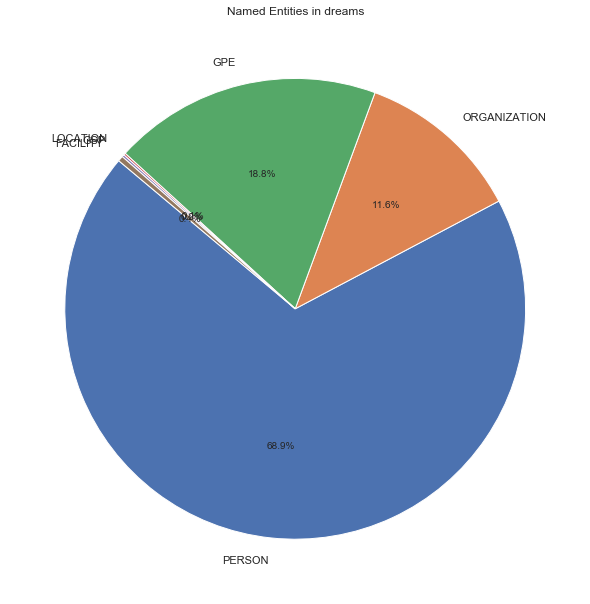

defaultdict(int,
            {'PERSON': 7740,
             'ORGANIZATION': 1307,
             'GPE': 2118,
             'LOCATION': 16,
             'GSP': 18,
             'FACILITY': 42})

In [63]:
# nltk NER
import nltk

# token_sentences = [regexp_tokenize(w, '\w+') for w in b_df.dream]
token_sentences = [word_tokenize(w) for w in b_df.dream]  ## é preciso manter as maiúsculas, etc

pos_dreams = [nltk.pos_tag(d) for d in token_sentences]

chunked_sentences = nltk.ne_chunk_sents(pos_dreams)

###### Chart

from collections import defaultdict

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.subplots_adjust(left=0, bottom=-1, right=1.8, top=1, wspace=0, hspace=0)
plt.title("Named Entities in dreams")
plt.show()


ner_categories

**SpaCy NER**

In [64]:
# SpaCy NER
import spacy

nlp = spacy.load('en_core_web_sm')

print(nlp.entity)

# dream 
n = 200
print(b_df.dream.iloc[n])

doc = nlp(b_df.dream.iloc[n])

print("\n", doc.ents, "\n")

for i in doc.ents:
    print(i,":", i.label_)   # --> treinar e importar vetores meus...

Ginny and I have an argument. She's explaining something to me. I find it hard to listen. I then see she's saying and doing some incredible things. Things and words and colors are coming out of her mouth like vomit. I'm scared and concerned for her and I'm also upset because these things have meaning for me, to help me. I ask her what drug she's on. My brother Dwight is there. She says, "9." I ask Dwight what that is. She follows me around and won't stop. After what seems like a long time, I start to do it too. Suddenly I see dazzling, sparkling blue and red colors like fireworks or prism colors on the end of my tongue. Ginny's face goes out of focus. I am aware that I'm letting go and I'm in a different state of awareness. I talk rapidly, non-stop, and I'm vaguely aware that I might be saying hurtful things that could hurt other people's feelings, but I know I must and it's O.K. It spews out of me unchecked.

 (Dwight, 9, Dwight, Ginny, O.K.) 

Dwight : PERSON
9 : CARDINAL
Dwight : WO

**polyglot .entities**

In [65]:
#polyglot
from polyglot.text import Text

# dream 
n = 200
dream_number = b_df.dream.iloc[n]
ptext = Text(dream_number)
print(ptext, "\n")

print(ptext.entities)  # melhor

########OR

entities = [(ent.tag, ' '.join(ent)) for ent in ptext.entities]
entities

Ginny and I have an argument. She's explaining something to me. I find it hard to listen. I then see she's saying and doing some incredible things. Things and words and colors are coming out of her mouth like vomit. I'm scared and concerned for her and I'm also upset because these things have meaning for me, to help me. I ask her what drug she's on. My brother Dwight is there. She says, "9." I ask Dwight what that is. She follows me around and won't stop. After what seems like a long time, I start to do it too. Suddenly I see dazzling, sparkling blue and red colors like fireworks or prism colors on the end of my tongue. Ginny's face goes out of focus. I am aware that I'm letting go and I'm in a different state of awareness. I talk rapidly, non-stop, and I'm vaguely aware that I might be saying hurtful things that could hurt other people's feelings, but I know I must and it's O.K. It spews out of me unchecked. 

[I-PER(['Ginny']), I-PER(["I'm"]), I-PER(['Dwight']), I-PER(['Dwight']), I-

[('I-PER', 'Ginny'),
 ('I-PER', "I'm"),
 ('I-PER', 'Dwight'),
 ('I-PER', 'Dwight'),
 ('I-PER', "it's")]

In [66]:
from polyglot.detect import Detector
detector = Detector(dream_number)
print(detector.language)

# https://polyglot.readthedocs.io/en/latest/index.html        -->Documentation

name: inglês      code: en       confidence:  99.0 read bytes:  1250


In [67]:
mixed_text = """ China (simplified Chinese: 中国; traditional Chinese: 中國),
officially the People's Republic of China (PRC), is a soverei n state located in East Asia"""

for language in Detector(mixed_text).languages:
    print(language)

print("\n", Text(mixed_text).entities)

name: inglês      code: en       confidence:  87.0 read bytes:  1124
name: chinês      code: zh_Hant  confidence:   5.0 read bytes:  1755
name: un          code: un       confidence:   0.0 read bytes:     0

 [I-LOC(['China']), I-LOC(["People's", 'Republic', 'of', 'China']), I-LOC(['East', 'Asia'])]


## 3) Text Representation & Feature Engineering
<a id="fe"></a>

## 4) Modeling / Pattern Mining
<a id="modeling"></a>

In [68]:
# number of times a word appears

# all words
CountVectorizer().fit(dreams_df.dream).get_feature_names()[:15]  

# nltk
from nltk.tokenize import word_tokenize
# [word_tokenize(d) for d in dreams_df.dream]   # slower

## ML Models: predict features of the data

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


### CountVectorizer() 

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
# dream example
text = [dreams_df['dream'][0]]
print("Dream example:\n{}".format('\n'.join(text)))

vectorizer = CountVectorizer()

# call 'fit' to build the vocabulary
vectorizer.fit(text)

# calling 'transform' to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print("")
print("Transformed text vector is \n{}".format(x))

# 'get_feature_names()' tracks which word is associated with each column of the transformed x
print("")
print("Words for each feature:")
print(vectorizer.get_feature_names())

# the bag of words treatment doesn't preserve information about the order of words, just their frequency

Dream example:
The one at the Meads's house, where it's bigger inside than out; there's a European village just inside, with a cobblestone street and a Pied-Piper sort of man with curly hair, he can do things like juggle - I go up the back stairs [there aren't any in the real house] and then down the other side [since there's a second set, immediately] then down a short empty hallway that turns a corner, where I find a tiny room...a young woman with shoulder-length blonde hair in a pageboy is there, cooking at a stove that almost fills the room...she's nice to me. Now outside, I'm waiting for my aunt to pick me up - she arrives in a little round convertible and we go for a drive, not very far - we cross a little bridge over a creek, then double back and she drops me off at the house again. Inside (?) I sit with a couple of people, playing with a string of blue balloons.

Transformed text vector is 
[[1 1 4 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2
  1 1 3 1 3 3 

In [72]:
# total number of unique words
vectorizer = CountVectorizer()

vectorizer.fit(dreams_df['dream'])

print("Total number of unique words: {}".format(len(vectorizer.get_feature_names())))
print("Total number of unique dreams: {}".format(len(dreams_df.dream.unique())))  # só há 1 repetido

Total number of unique words: 35574
Total number of unique dreams: 19430


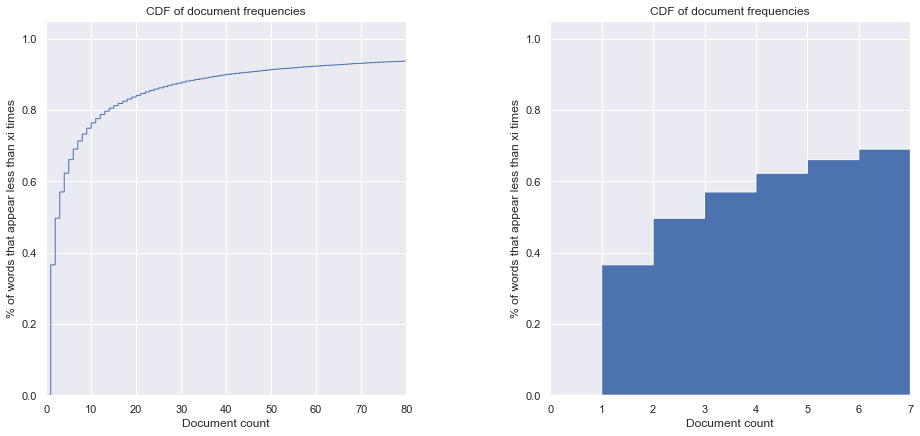

In [73]:
# cumulative distribution (CDF) of document frequencies - df

# bag of words
X = vectorizer.fit_transform(dreams_df.dream)

doc_freq = pd.Series(sorted(np.sum(X > 0, axis=0).tolist()[0]))
cum = np.arange(np.sum(doc_freq))

# plot 
plt.subplot(1, 2, 1)
plt.hist(doc_freq, cum, density=True, cumulative=True, histtype='step')
plt.xlim(0,80)
plt.title("CDF of document frequencies")
plt.xlabel("Document count")
plt.ylabel("% of words that appear less than xi times")
plt.xticks(range(0, 81, 10))

# zoomed version
plt.subplot(1, 2, 2)
plt.hist(doc_freq, cum, density=True, cumulative=True, histtype='stepfilled')
plt.xlim(0,6)
plt.title("CDF of document frequencies")
plt.xlabel("Document count")
plt.ylabel("% of words that appear less than xi times")
plt.xticks(range(8))

plt.subplots_adjust(left=0, bottom=-0.3, right=2, top=1, wspace=0.4, hspace=0)
plt.show()

# min_df = 3 ?
# max_df = 20 ?

In [74]:
np.sum(X, axis=0).tolist()[0]
cum

array([      0,       1,       2, ..., 1665271, 1665272, 1665273],
      dtype=int64)

In [75]:
# min_df could be = 1 & max_df could be 25 or 30

In [76]:
pd.get_dummies(dreams_df['id']).head()

,alta,angie,arlie,b,b2,bay_area_girls_456,bay_area_girls_789,bea1,bea2,blind-f,...,phil3,physiologist,ringo,samantha,seventh_graders,toby,tom,ucsc_women,vickie,west_coast_teens
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data (X)

In [77]:
n = 10
top_dreamers = dreams_df['name'].value_counts(ascending=True).tail(n)

# top 10 dreamers
use_df = dreams_df[dreams_df.name.isin(top_dreamers.index)]

# X
X = dreams_df['dream']
X_top_dreamers = use_df['dream']

## Target (y)

In [78]:
# y
y = dreams_df['sex']
y_top_dreamers = use_df['sex']

### CountVectorizer() and MultinomialNB()

In [79]:
from sklearn.naive_bayes import MultinomialNB

All

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# features & target
X = dreams_df['dream']
y = dreams_df['sex']

# split into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer() # stop_words='english' ---> o score fica pior!
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)


# MultinomialNB() classifier with default parameters.
classifier = 'MultinomialNB'
nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)

# score
print("train Accuracy score: {}".format(accuracy_score(y_train, nb_classifier.predict(count_train))))
print("test Accuracy score: {}".format(accuracy_score(y_test, pred)), "\n")

train Accuracy score: 0.9044923167414161
test Accuracy score: 0.8550600343053173 



In [81]:
from sklearn.naive_bayes import ComplementNB

# ComplementNB() classifier with default parameters.
classifier = 'ComplementNB'
nb_classifier = ComplementNB()

nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)

# score
print("train Accuracy score: {}".format(accuracy_score(y_train, nb_classifier.predict(count_train))))
print("test Accuracy score: {}".format(accuracy_score(y_test, pred)), "\n")

train Accuracy score: 0.9042717447246525
test Accuracy score: 0.8543739279588336 



##### Outra maneira de fazer o mesmo - diferenças?

In [82]:
# features & target

X = CountVectorizer().fit_transform(dreams_df.dream)#.tocsc()
# X = dreams_df['dream'] 
y = dreams_df['sex'] #.values.astype(np.int)

classifier = 'MultinomialNB'

# Multinomial Naïve Bayes

# split into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# MultinomialNB() classifier with default parameters.
multi_nb = MultinomialNB()

# train the classifier over the training set and test on the test set
multi_nb.fit(X_train, y_train)

y_pred = multi_nb.predict(X_test)

# accuracy scores for both the training and the test sets
print("Accuracy score for the training set: {}".format(multi_nb.score(X_train, y_train)))
print("Accuracy score for the test set: {}".format(multi_nb.score(X_test, y_test)))


Accuracy score for the training set: 0.906183368869936
Accuracy score for the test set: 0.8545454545454545


In [83]:
# Tuning

from sklearn.model_selection import train_test_split, GridSearchCV

# hyperparameter grid
param_grid = {'alpha': np.arange(1.0e-10, 1, 0.1)}

grid_mnb = GridSearchCV(multi_nb, param_grid=param_grid, cv=5, iid=False)

grid_mnb.fit(X_train, y_train)

# hyperparametes & accuracy
print("\nTuned MultinomialNB Parameters: {}".format(grid_mnb.best_params_))
print('All: accuracy score for {} with tuning: {}'.format(classifier, grid_mnb.score(X_test, y_test)))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning



Tuned MultinomialNB Parameters: {'alpha': 0.6000000001000001}
All: accuracy score for MultinomialNB with tuning: 0.8548885077186964


#### Predictions

In [84]:
# sentence = dreams_df['dream'][0]  # alta dream
sentence = "I was talking with Jung and he was looking at me as if I knew something."
sentence

'I was talking with Jung and he was looking at me as if I knew something.'

In [85]:
# fit to build the vocabulary: dreams vocabulary
vectorizer = CountVectorizer().fit(dreams_df['dream'])   

# transform to convert the sentence to a bag of words
sentence_transformed = vectorizer.transform([sentence])

# Predict
print("Prediction of the sentence: {}".format(grid_mnb.predict(sentence_transformed)))


Prediction of the sentence: ['M']


In [86]:
(dreams_df.id == 'alta').values.astype(np.int)  # target: if it's alta id (1) or not (0)

array([1, 1, 1, ..., 0, 0, 0])

### CountVectorizer() and OneVsRestClassifier

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

#### LogisticRegression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import HashingVectorizer

Top 10 dreamers

In [89]:
# 10 Top dreamers

# LogisticRegression
classifier = 'OneVsRestClassifier / LogisticRegression'

X_top_dreamers = use_df['dream']
y_top_dreamers = use_df['sex']

SEED = 2

X_train, X_test, y_train, y_test = train_test_split(X_top_dreamers, y_top_dreamers, random_state=SEED)

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', OneVsRestClassifier(LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=10000)))])

pl.fit(X_train, y_train)

# accuracy
print('Top10: accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test))) #0.8550209880529545

#############################################

from sklearn.feature_extraction.text import HashingVectorizer

vec = HashingVectorizer(norm=None, ngram_range=(1, 2))

pl = Pipeline([('vec', vec), 
               ('clf', OneVsRestClassifier(LogisticRegression(class_weight='balanced',solver='lbfgs', max_iter=10000)))])

pl.fit(X_train, y_train)

# accuracy
print('Top10: accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))

Top10: accuracy score for OneVsRestClassifier / LogisticRegression without tuning: 0.9318695511785599
Top10: accuracy score for OneVsRestClassifier / LogisticRegression without tuning: 0.9363900548918308


#### Prediction

In [90]:
# sentence = dreams_df['dream'][0]  # alta dream
sentence = "I was talking with Jung and he was looking at me as if I knew something."
sentence

'I was talking with Jung and he was looking at me as if I knew something.'

In [91]:
# Predict
print("Prediction of the sentence: {}".format(pl.predict([sentence])))

Prediction of the sentence: ['M']


#### All dreamers

In [92]:
%%time
# All

# LogisticRegression
classifier = 'LogisticRegression'

X = dreams_df['dream']
y = dreams_df['sex']        # target

SEED = 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

###############################

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', OneVsRestClassifier(LogisticRegression(class_weight='balanced',
                                                              solver='sag', max_iter=10000, random_state=SEED)))])

pl.fit(X_train, y_train)

# accuracy
print('All: accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test))) 

################################

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', LogisticRegression(class_weight='balanced',
                                          solver='sag', max_iter=10000, random_state=SEED))])

pl.fit(X_train, y_train)

# accuracy
print('All: accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test))) 


All: accuracy score for LogisticRegression without tuning: 0.8655825442568958
All: accuracy score for LogisticRegression without tuning: 0.8655825442568958
Wall time: 1min 57s


Tuning

In [93]:
%%script false    # ---> como fazer o tune dos hyperparameters qd se tem o CountVectorizer antes no Pipeline
%%time

# Tuning

pl_to_tune = Pipeline([('vec', CountVectorizer()), 
                     ('clf', LogisticRegression(class_weight='balanced',
                                                solver='sag', max_iter=10000, random_state=SEED))])

# hyperparameter grid
param_grid = {'C': [0, 1, 2], 'penalty': ['l1', 'l2']}

grid_logreg = GridSearchCV(pl_to_tune, param_grid=param_grid, cv=3, iid=False)

grid_logreg.fit(X_train, y_train)

# hyperparametes & accuracy
print("\nTuned Logistic Regression Parameters: {}".format(grid_logreg.best_params_))
print('All: accuracy score for {} with tuning: {}'.format(classifier, grid_logreg.score(X_test, y_test)))


Couldn't find program: 'false'


#### DecisionTreeClassifier

In [94]:
from sklearn.tree import DecisionTreeClassifier

All

In [95]:
%%time

classifier = 'DecisionTreeClassifier'

SEED = 2

X = dreams_df['dream']
y = dreams_df['sex']        # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', DecisionTreeClassifier(class_weight='balanced'))])   

pl.fit(X_train, y_train)

# accuracy
print('accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))   # 0.4545080279950597

#############################################

# Tuning

##############################################

# Predictions



accuracy score for DecisionTreeClassifier without tuning: 0.7713050638122684
Wall time: 12 s


#### RandomForestClassifier

In [96]:
from sklearn.ensemble import RandomForestClassifier

All

In [97]:
%%time

classifier = 'RandomForestClassifier'

SEED = 2

X = dreams_df['dream']
y = dreams_df['sex']        # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', RandomForestClassifier(n_estimators=100, class_weight='balanced'))])

pl.fit(X_train, y_train)

# accuracy
print('accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))  

#############################################

# Tuning

##############################################

# Predictions


accuracy score for RandomForestClassifier without tuning: 0.8266776451214491
Wall time: 31.1 s


#### AdaBoostClassifier

In [98]:
from sklearn.ensemble import AdaBoostClassifier

All

In [99]:
%%time 

classifier = 'AdaBoostClassifier (DecisionTreeClassifier)'

SEED = 2

X = dreams_df['dream']
y = dreams_df['sex']        # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

pl = Pipeline([('vec', CountVectorizer()), 
        ('clf', OneVsRestClassifier(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'))))]) 

pl.fit(X_train, y_train)

# accuracy
print('accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))  # 0.6414162206669412

#############################################

# Tuning

##############################################

# Predictions


accuracy score for AdaBoostClassifier (DecisionTreeClassifier) without tuning: 0.7686290654590366
Wall time: 12.8 s


In [100]:
%%time

classifier = 'AdaBoostClassifier w/ LogisticRegression'

SEED = 2

X = dreams_df['dream']
y = dreams_df['sex']        # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

pl = Pipeline([
    ('vec', CountVectorizer()), 
    ('clf', OneVsRestClassifier(AdaBoostClassifier(base_estimator=LogisticRegression(class_weight='balanced',
                                                                                     solver='lbfgs', max_iter=10000))))
    ])

pl.fit(X_train, y_train)

# accuracy
print('accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))  

#############################################                                                    

# Tuning

##############################################

# Predictions


accuracy score for AdaBoostClassifier w/ LogisticRegression without tuning: 0.4007822149032524
Wall time: 22.3 s


#### KNeighborsClassifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier

All

In [102]:


classifier = 'KNeighborsClassifier'

SEED = 2

X = dreams_df['dream']
y = dreams_df['sex']        # target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

pl = Pipeline([('vec', CountVectorizer()), 
               ('clf', KNeighborsClassifier(n_neighbors=1))])   # tb n precisa de usar um multiclass antes

pl.fit(X_train, y_train)

# accuracy
print('accuracy score for {} without tuning: {}'.format(classifier, pl.score(X_test, y_test)))    # 0.3108275010292301

#############################################

# Tuning

##############################################

# Predictions


accuracy score for KNeighborsClassifier without tuning: 0.670646356525319


In [103]:
# save to excel
dreams_df.to_excel('dreams_df.xlsx')

## 5) Evaluation 
<a id="evaluation"></a>

## 6) Deployment